In [5]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [108]:
def convolve_im(im: np.array,
                kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution
        
        Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)

    ## define image and kernel height and width
    imHeight = im.shape[0]
    imWidth = im.shape[1]
    kernelHeight = kernel.shape[0]
    kernelWidth = kernel.shape[1]

    ## Ensure that kernel size is odd
    if kernelHeight%2==0 or kernelWidth%2 == 0:
        print("kernel dimensions are not odd!")

    ## Calculate border with to handle edge cases
    border_width = kernelHeight // 2

    ## zero padding
    im_padded = np.pad(im, ((border_width, border_width), (border_width, border_width)), mode="constant")

    
    f = np.fft.fft2(im_padded)
    fft_kernel = np.fft.fft2(kernel, s=f.shape)
    fshift = np.fft.fftshift(f)
    kshift = np.fft.fftshift(fft_kernel)
    fft = np.log(np.abs(fshift))
    fftresult = kshift*fft
    conv_result = np.fft.ifft2(f*fft_kernel).real

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        ## image
        plt.subplot(1, 5, 1)
        plt.imshow(im_padded, cmap="gray")
        ## FFT
        plt.subplot(1, 5, 2)
        plt.imshow(fft, cmap="gray")
        ## kernel
        plt.subplot(1, 5, 3)
        plt.imshow(np.abs(kshift), cmap="gray")
        ## FFT image
        plt.subplot(1, 5, 4)
        plt.imshow(np.abs(fftresult), cmap="gray")
        ## Filtered spatial image
        plt.subplot(1, 5, 5) 
        plt.imshow(conv_result, cmap="gray")

    ### END YOUR CODE HERE ###
    return conv_result

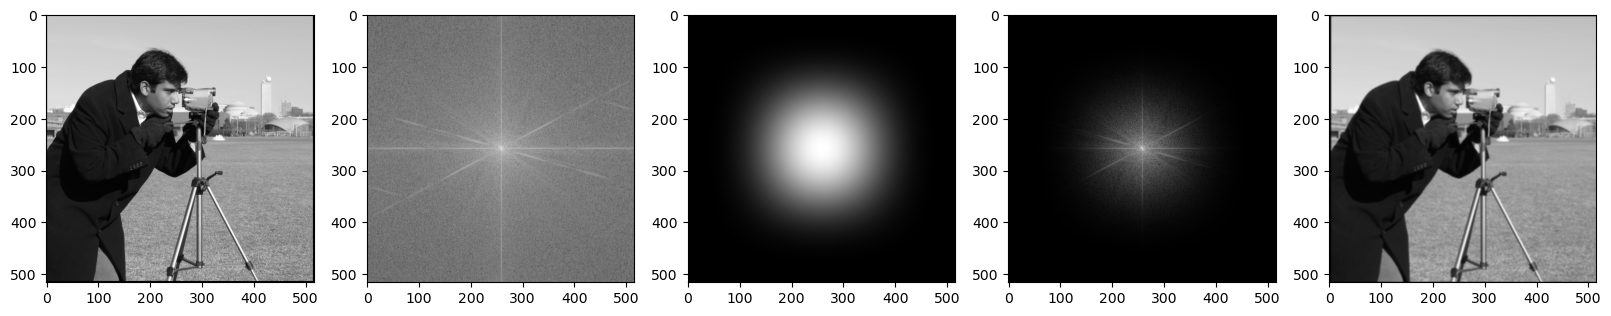

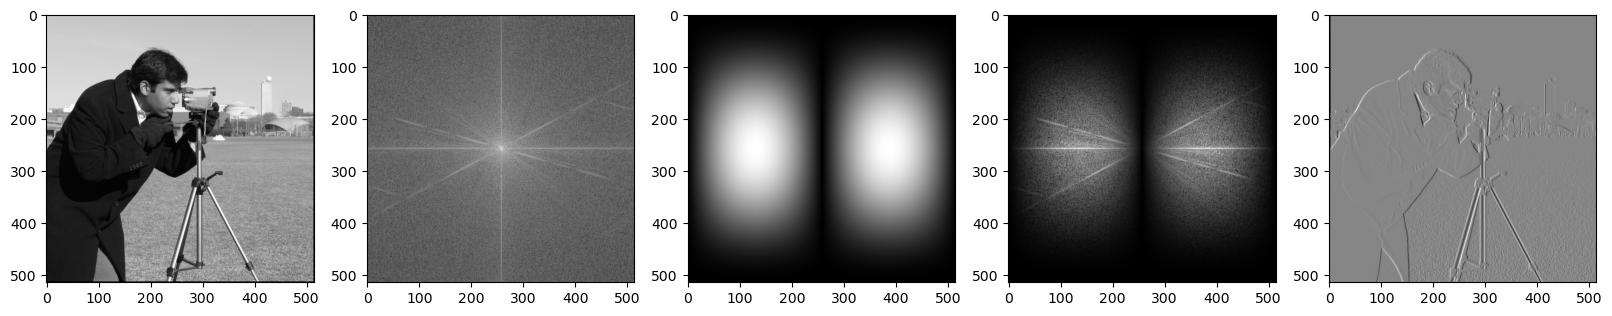

Saving image to: image_processed/camera_gaussian.png
Saving image to: image_processed/camera_sobelx.png


In [109]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im(im, sobel_horizontal, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)